In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Read the CSV and Perform Basic Data Cleaning

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Select Y Value
y = df.reindex(columns=['koi_disposition'])
y.head()

,koi_disposition
0,CONFIRMED
1,FALSE POSITIVE
2,FALSE POSITIVE
3,CONFIRMED
4,CONFIRMED


# Select your features (columns)

In [ ]:
# Removing y from data
x_temp = df.copy()
x_temp.drop('koi_disposition', inplace=True, axis=1)
x_temp.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [ ]:
# Getting feature importance instead of chi squared due to negetive values
model = ExtraTreesClassifier()
model.fit(x_temp,y)
print(model.feature_importances_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.13517741 0.16814157 0.12618112 0.05316539 0.01641015 0.01426917
 0.01419826 0.01216995 0.02164633 0.02416983 0.01259109 0.01137254
 0.0101907  0.01711837 0.02853432 0.02793455 0.02240085 0.0129201
 0.01228849 0.01376711 0.01229467 0.01082014 0.01673488 0.00918935
 0.00933499 0.00902862 0.0274877  0.00923778 0.01005024 0.02002374
 0.01776951 0.01061568 0.0096451  0.01297819 0.00873754 0.01092549
 0.0085984  0.01167968 0.0102484  0.00995257]


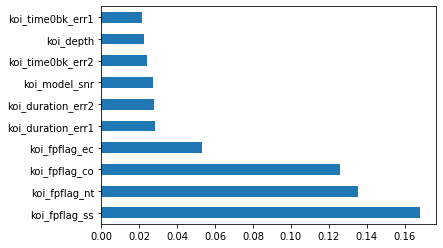

In [ ]:
# Plotting 15 most important
feat_importances = pd.Series(model.feature_importances_, index=x_temp.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# Extract features
t_feat = feat_importances.nlargest(15)
columns = t_feat.head(10)
x = x_temp.reindex(columns=columns.index)
x.head()

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_duration_err1,koi_duration_err2,koi_model_snr,koi_time0bk_err2,koi_depth,koi_time0bk_err1
0,0,0,0,0,0.11600,-0.11600,25.8,-0.003520,874.8,0.003520
1,1,0,0,0,0.03410,-0.03410,76.3,-0.000581,10829.0,0.000581
2,1,0,0,0,0.00537,-0.00537,505.6,-0.000115,8079.2,0.000115
3,0,0,0,0,0.04200,-0.04200,40.9,-0.001130,603.3,0.001130
4,0,0,0,0,0.06730,-0.06730,40.2,-0.001900,686.0,0.001900


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.data_max_)
x = scaler.transform(x)
print(x)

MinMaxScaler(copy=True, feature_range=(0, 1))
[ 1.0000e+00  1.0000e+00  1.0000e+00  1.0000e+00  2.0200e+01  0.0000e+00
  9.0547e+03 -8.7000e-06  1.5414e+06  5.6900e-01]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.93828904e-01
  5.62673038e-04 6.17109611e-03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.98994185e-01
  7.02059988e-03 1.00581503e-03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.99813178e-01
  5.23662857e-03 1.86821837e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.86500145e-01
  2.65993250e-05 1.34998549e-02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 9.95006426e-01
  6.23462227e-05 4.99357372e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 9.81034332e-01
  4.48944704e-05 1.89656678e-02]]


# Create a Train Test Split

Use `koi_disposition` for the y values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Train the Model



In [ ]:
# Training Ranndom Forest Claasifier
model2 = RandomForestClassifier(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print(f"Training Data Score: {model2.score(X_train, y_train)}")
print(f"Testing Data Score: {model2.score(X_test, y_test)}")

Training Data Score: 0.8667520819987188
Testing Data Score: 0.8639514731369151


In [ ]:
# Training Decision Tree Classifier
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print(f"Training Data Score: {model1.score(X_train, y_train)}")
print(f"Testing Data Score: {model1.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.834055459272097


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model with RandomForest
model = RandomForestClassifier()
grid_values = {'n_estimators': [10, 30, 50, 100],
               'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
               'max_depth' : [4,5,6,7,8],
              }
grid2 = GridSearchCV(model, param_grid = grid_values, scoring = 'accuracy')

In [ ]:
# Train the model with GridSearch
grid2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

{'max_depth': 8, 'max_features': 1.0, 'n_estimators': 30}
0.8827623165403315


In [ ]:
# Decision Tree with tuning parameters
model1 = DecisionTreeClassifier(random_state=42)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid1 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [ ]:
grid1.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   17.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [ ]:
print(grid1.best_params_)
print(grid1.best_score_)

{'max_leaf_nodes': 23, 'min_samples_split': 2}
0.8808456117873158


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Jamal_RandForesst.sav'
joblib.dump(grid2, filename)

['Jamal_RandForesst.sav']

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Jamal_DecTree.sav'
joblib.dump(grid1, filename)

['Jamal_DecTree.sav']